In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor

file_path = r"C:\Users\18014\Desktop\Masters\D600 - Statistical Data Mining\Task 2\D600 Task 2 Dataset 1 Housing Information.csv"

df = pd.read_csv(file_path)

In [4]:
df

,ID,Price,SquareFootage,NumBathrooms,NumBedrooms,BackyardSpace,CrimeRate,SchoolRating,AgeOfHome,DistanceToCityCenter,...,RenovationQuality,LocalAmenities,TransportAccess,Fireplace,HouseColor,Garage,Floors,Windows,PreviousSalePrice,IsLuxury
0,4922,255614.8992,566.62,1.000000,4,779.42,20.56,5.62,39.46,10.08,...,4.93,4.44,4.55,Yes,Blue,No,1,13,181861.54230,0
1,5009,155586.0947,1472.34,1.000000,2,656.13,15.62,5.63,40.51,7.89,...,4.08,5.56,6.83,No,Green,No,1,17,50042.59757,0
2,4450,131050.8324,550.00,1.779354,3,754.57,12.47,9.20,48.38,23.74,...,4.26,8.07,8.48,Yes,Green,Yes,2,34,48400.34440,0
3,1070,151361.7125,941.81,2.035254,2,439.59,22.22,7.08,94.67,5.22,...,4.45,5.00,6.27,Yes,Red,No,1,14,84594.12145,0
4,400,113167.6128,550.00,1.064644,3,353.03,8.28,5.93,16.80,43.13,...,3.36,5.46,6.99,No,White,Yes,1,21,22934.59654,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,6987,307821.1758,550.00,2.111022,4,892.35,11.89,7.97,28.18,19.23,...,4.76,3.81,6.87,No,White,Yes,1,18,241131.63070,1
6996,6995,421368.8869,1726.12,4.056115,2,943.19,34.06,5.82,90.45,17.60,...,5.31,9.84,10.00,No,White,Yes,1,18,481604.80730,1
6997,6996,473382.5348,1026.36,2.077177,5,149.31,0.10,8.81,31.79,11.59,...,4.98,7.47,2.96,No,Green,No,1,13,380555.49390,1
6998,6998,343397.9756,2218.22,1.000000,4,526.81,11.18,9.20,15.21,3.96,...,4.68,7.66,6.12,No,Blue,Yes,1,10,442610.31710,0


In [15]:
#Descriptive statistics for the dependent variable
descriptive_stats = df['IsLuxury'].value_counts()
proportions = df['IsLuxury'].value_counts(normalize=True)

print("Frequency of each category:")
print(descriptive_stats)

print("\nProportion of each category:")
print(proportions)

Frequency of each category:
IsLuxury
1    3528
0    3472
Name: count, dtype: int64

Proportion of each category:
IsLuxury
1    0.504
0    0.496
Name: proportion, dtype: float64


In [11]:
#Descriptive statistics for independent variables
variable_columns = ['SquareFootage', 'NumBedrooms']
stats = df[variable_columns].describe()

# Display the results
print(stats)

       SquareFootage  NumBedrooms
count    7000.000000  7000.000000
mean     1048.947459     3.008571
std       426.010482     1.021940
min       550.000000     1.000000
25%       660.815000     2.000000
50%       996.320000     3.000000
75%      1342.292500     4.000000
max      2874.700000     7.000000


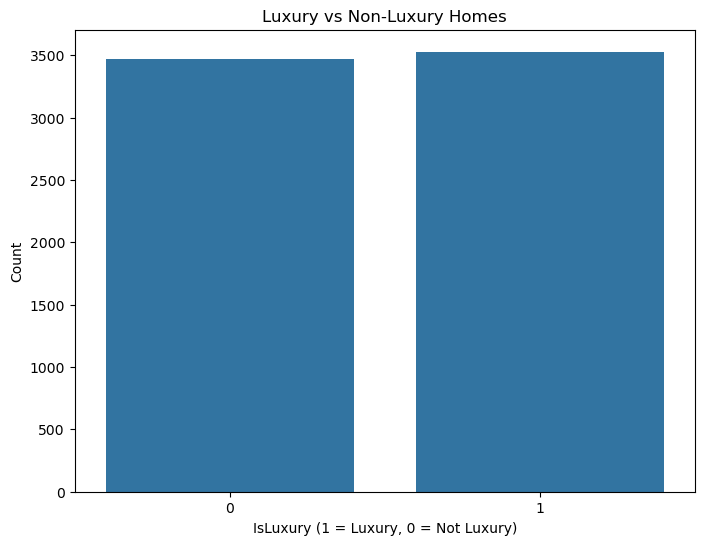

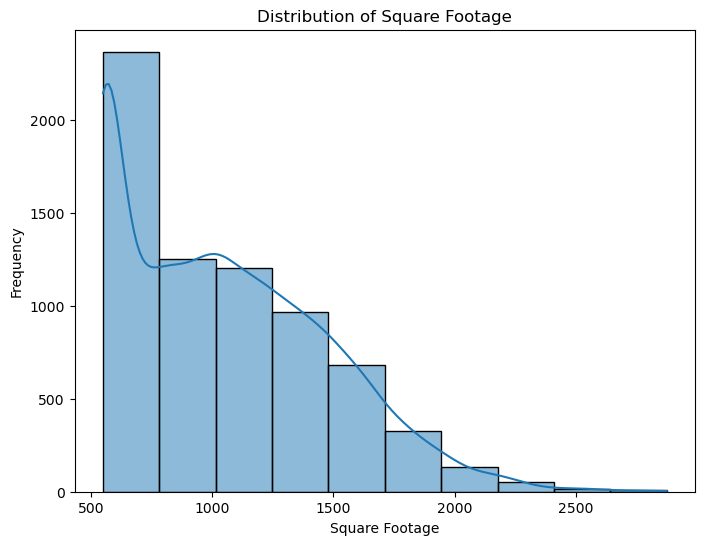

Text(0, 0.5, 'Count')

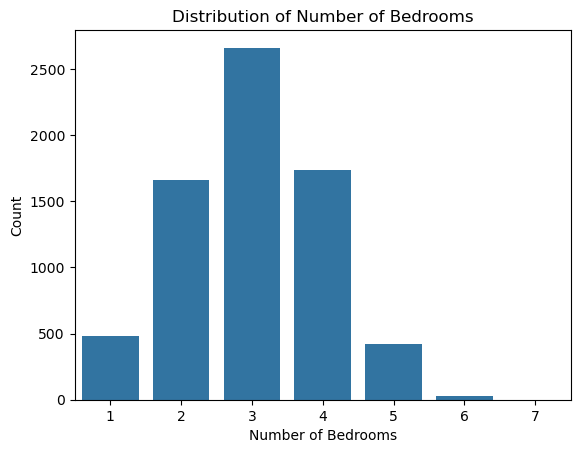

In [17]:
#Univariate visualizations
#Histogram of Price distribution
plt.figure(figsize=(8, 6))

sns.countplot(x='IsLuxury', data=df)
plt.title('Luxury vs Non-Luxury Homes')
plt.xlabel('IsLuxury (1 = Luxury, 0 = Not Luxury)')
plt.ylabel('Count')


#Histogram of square Footage distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['SquareFootage'], kde=True, bins=10)
plt.title('Distribution of Square Footage')
plt.xlabel('Square Footage')
plt.ylabel('Frequency')
plt.show()

sns.countplot(x='NumBedrooms', data=df)
plt.title('Distribution of Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')

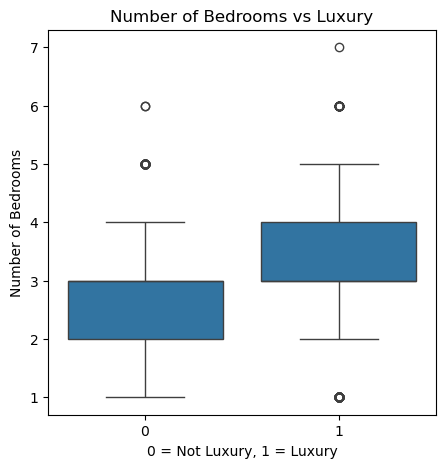

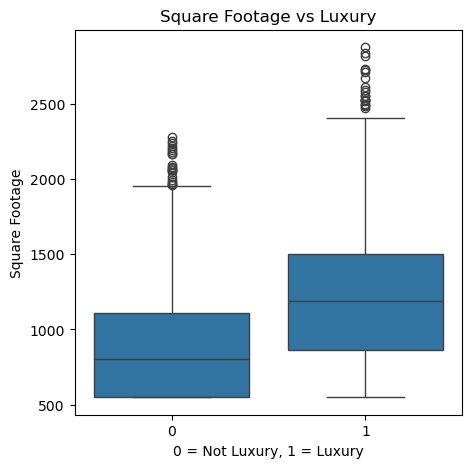

In [9]:
#Bivariate visualizations

#Box plot for NumBedrooms vs IsLuxury
plt.figure(figsize=(5, 5))
sns.boxplot(x='IsLuxury', y='NumBedrooms', data=df)
plt.title('Number of Bedrooms vs Luxury')
plt.xlabel('0 = Not Luxury, 1 = Luxury')
plt.ylabel('Number of Bedrooms')
plt.show()

#Box plot for SquareFootage vs IsLuxury
plt.figure(figsize=(5, 5))
sns.boxplot(x='IsLuxury', y='SquareFootage', data=df)
plt.title('Square Footage vs Luxury')
plt.xlabel('0 = Not Luxury, 1 = Luxury')
plt.ylabel('Square Footage')
plt.show()

In [11]:
#Defining the independent variables (SquareFootage, NumBedrooms)
X = df[['SquareFootage', 'NumBedrooms']]

#Defining the dependent variable (IsLuxury)
y = df['IsLuxury']

#Split the data 80/20 for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#Add a constant/intercept to the model
X_train = sm.add_constant(X_train)

#Fitting to logistic regression
logit_model = sm.Logit(y_train, X_train).fit()

print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.570792
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               IsLuxury   No. Observations:                 5600
Model:                          Logit   Df Residuals:                     5597
Method:                           MLE   Df Model:                            2
Date:                Mon, 21 Oct 2024   Pseudo R-squ.:                  0.1765
Time:                        14:47:37   Log-Likelihood:                -3196.4
converged:                       True   LL-Null:                       -3881.6
Covariance Type:            nonrobust   LLR p-value:                2.765e-298
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -4.2880      0.141    -30.419      0.000      -4.564      -4.012
SquareFootage     0.

In [13]:
#Predicting the training set
y_train_pred = logit_model.predict(X_train)

#Converting probabilities to binary
y_train_pred_binary = [1 if prob > 0.5 else 0 for prob in y_train_pred]

#Add a constant to X_test
X_test = sm.add_constant(X_test)

#Predicting probabilities on test
y_test_pred = logit_model.predict(X_test)

#Converting probabilities to binary
y_test_pred_binary = np.where(y_test_pred > 0.5, 1, 0)

#Comparing the actual vs predicted values in a DataFrame
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred_binary})
print(comparison.head())

      Actual  Predicted
2305       0          0
4388       1          1
1686       0          0
4945       1          1
4197       1          1


In [15]:
#Accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred_binary)
test_accuracy = accuracy_score(y_test, y_test_pred_binary)

print(f'Training Accuracy Score: {train_accuracy}')
print(f'Test Accuracy Score: {test_accuracy}')

#Confusion matrices
train_conf_matrix = confusion_matrix(y_train, y_train_pred_binary)
test_conf_matrix = confusion_matrix(y_test, y_test_pred_binary)

print('Training Confusion Matrix:')
print(train_conf_matrix)
print('Test Confusion Matrix:')
print(test_conf_matrix)

Training Accuracy Score: 0.7141071428571428
Test Accuracy Score: 0.7142857142857143
Training Confusion Matrix:
[[2035  755]
 [ 846 1964]]
Test Confusion Matrix:
[[521 161]
 [239 479]]


In [17]:
#Optimization begins here

In [19]:
#Backward stepwise elimination for optimization
X = df[['SquareFootage', 'NumBedrooms']]
y = df['IsLuxury']

X = sm.add_constant(X)

#Fitting the model
model = sm.Logit(y, X).fit()

#Backward Elimination code
def backward_elimination(X, y, threshold_in=0.05):
    features = X.columns.tolist()
    
    while True:
        model = sm.Logit(y, X[features]).fit(disp=0)
        
        p_values = model.pvalues
        
        max_p_value = p_values.max()
        
        if max_p_value > threshold_in:
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
            print(f'Removed: {excluded_feature} with p-value: {max_p_value}')
        else:
            break
    
    return features, model

#Perform backward elimination
final_features, optimized_model = backward_elimination(X, y)

#Displaying a summary of the optimized model
print(optimized_model.summary())

Optimization terminated successfully.
         Current function value: 0.571323
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               IsLuxury   No. Observations:                 7000
Model:                          Logit   Df Residuals:                     6997
Method:                           MLE   Df Model:                            2
Date:                Mon, 21 Oct 2024   Pseudo R-squ.:                  0.1757
Time:                        14:47:42   Log-Likelihood:                -3999.3
converged:                       True   LL-Null:                       -4851.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -4.2498      0.125    -33.947      0.000      -4.495      -4.004
SquareFootage     0.

In [21]:
#Running the prediction of the test data on the optimized model
y_test_pred_prob = optimized_model.predict(X_test[final_features])
y_test_pred_binary = [1 if prob > 0.5 else 0 for prob in y_test_pred_prob]

#A new dataframe for the results
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted_Probability': y_test_pred_prob,
    'Predicted': y_test_pred_binary})

#Showing the results of the predictions on the optimized model
print("Test Results:")
print(results_df)

Test Results:
      Actual  Predicted_Probability  Predicted
2305       0               0.155008          0
4388       1               0.598030          1
1686       0               0.179974          0
4945       1               0.516358          1
4197       1               0.889806          1
...      ...                    ...        ...
2090       0               0.668759          1
997        0               0.338520          0
4672       1               0.351576          0
3152       0               0.329909          0
5823       1               0.472016          0

[1400 rows x 3 columns]


In [23]:
y_pred = model.predict(X_test)
y_pred_bin = [1 if x >= 0.5 else 0 for x in y_pred]
cm = confusion_matrix(y_test, y_pred_bin)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[517 165]
 [228 490]]


In [25]:
accuracy = accuracy_score(y_test, y_pred_bin)

print(f"Accuracy: {accuracy}")

Accuracy: 0.7192857142857143


In [27]:
#----Checking for verification of assumptions starts here

In [29]:
#1. Testing for collinearilty between square footage and number of bedrooms
X = df[['SquareFootage', 'NumBedrooms']]
X = sm.add_constant(X)

# Calculating Variance Inflation Factor
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print(vif)

        Variable        VIF
0          const  14.564638
1  SquareFootage   1.007749
2    NumBedrooms   1.007749


In [31]:
#2. Checking the unique values of IsLuxury
print(df['IsLuxury'].unique())

[0 1]


In [33]:
#3. Checking for independce by looking for duplicate rows in the dataset
duplicates = df.duplicated().sum()

print(f'Number of duplicate rows: {duplicates}')

Number of duplicate rows: 0


In [35]:
#4. Checking for proper sample size was done at the beginning, showing 7,000 data entries